In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'axes.grid': False, 'grid.linestyle': ':'})

In [4]:
import plotly

In [3]:
import pandas as pd
import plotly.express as px

# Assuming you have the CSV file loaded as 'data'
data = pd.read_csv('train.csv')  # Replace with the actual path to your CSV file

# Correcting the column names based on the error message
fig = px.bar(data, x='Dataset', y='mAP', color='Model', barmode='group',
             title='Comparison of mAP Scores: YOLOv8 vs RT-DETR',
             labels={'mAP': 'mean Average Precision (mAP)', 'Dataset': 'Dataset'})

fig.show()


In [26]:
import supervisely as sly
import os
from PIL import Image

def download_and_render(api: sly.Api, img_id, project_id):
    img_np = api.image.download_np(img_id)
    ann_json = api.annotation.download_json(img_id)
    project_meta = api.project.get_meta(project_id)
    project_meta = sly.ProjectMeta.from_json(project_meta)
    ann = sly.Annotation.from_json(ann_json, project_meta)
    ann.draw(img_np, fill_rectangles=False, thickness=5, color=[0, 170, 0])
    img = Image.fromarray(img_np)
    img.show()

def download_and_save(api: sly.Api, img_id, project_id, path):
    img_np = api.image.download_np(img_id)
    ann_json = api.annotation.download_json(img_id)
    project_meta = api.project.get_meta(project_id)
    project_meta = sly.ProjectMeta.from_json(project_meta)
    ann = sly.Annotation.from_json(ann_json, project_meta)
    ann.draw(img_np, fill_rectangles=False, thickness=5, color=[0, 170, 0])
    img = Image.fromarray(img_np)
    img.save(path)

def parse_url(url):
    dataset_id = url.split('datasetId=')[1].split('&')[0]
    image_id = url.split('imageId=')[1].split('&')[0]
    return dataset_id, image_id

def download_by_url(url, path):
    api = sly.Api()
    dataset_id, img_id = parse_url(url)
    project_id = api.dataset.get_info_by_id(dataset_id).project_id
    img_np = api.image.download_np(img_id)
    ann_json = api.annotation.download_json(img_id)
    project_meta = api.project.get_meta(project_id)
    project_meta = sly.ProjectMeta.from_json(project_meta)
    ann = sly.Annotation.from_json(ann_json, project_meta)
    ann.draw(img_np, fill_rectangles=False, thickness=5)
    img = Image.fromarray(img_np)
    img.save(path)

download_by_url("https://dev.supervise.ly/app/images2/?datasetId=87506&imageId=30009980", "plants_gt.jpg")
download_by_url("https://dev.supervise.ly/app/images2/?datasetId=87719&imageId=30146083", "plants_rtdetr.jpg")
download_by_url("https://dev.supervise.ly/app/images2/?datasetId=87720&imageId=30146272", "plants_yolov8.jpg")

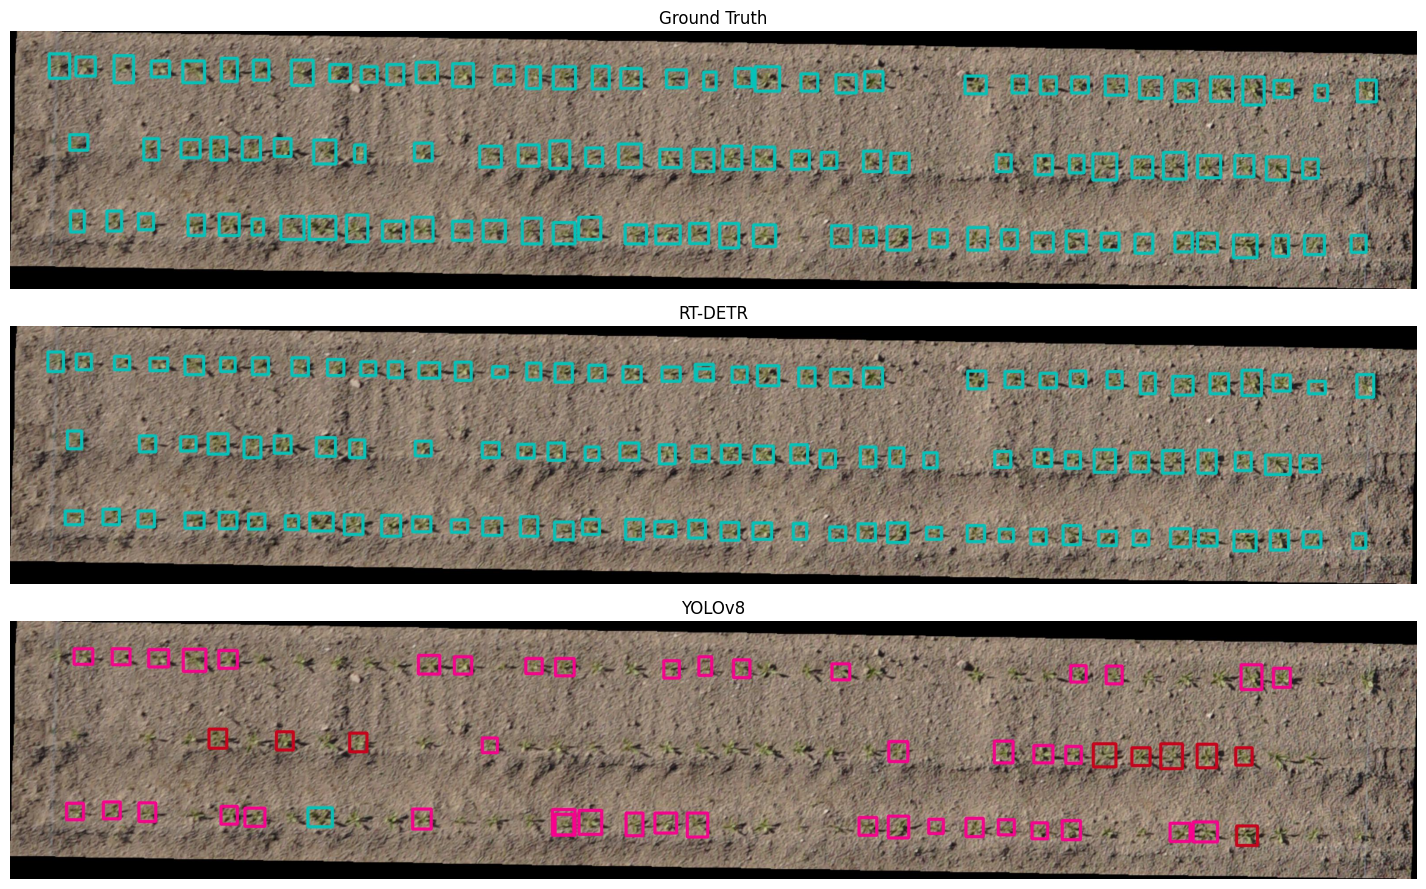

In [39]:
img_1 = Image.open("plants_gt.jpg")
img_2 = Image.open("plants_rtdetr.jpg")
img_3 = Image.open("plants_yolov8.jpg")

fig, ax = plt.subplots(3, 1, figsize=(15, 9))
ax[0].imshow(img_1)
ax[0].set_title('Ground Truth')
ax[0].axis('off')
ax[1].imshow(img_2)
ax[1].set_title('RT-DETR')
ax[1].axis('off')
ax[2].imshow(img_3)
ax[2].set_title('YOLOv8')
ax[2].axis('off')
plt.tight_layout()
plt.savefig("plants_comparison.jpg")